# Optional lab: Gradient Descent for Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Data set


In [2]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

In [3]:
def plot_data(X_train, y_train, ax):
    colors = np.array(['red', 'blue'])
    ax.scatter(X_train[:, 0], X_train[:, 1], c = colors[y_train], s = 100, edgecolor='k')
    for i in range(2):
        ax.scatter([], [], c = colors[i], label = f'y = {i}')
    ax.set_ylabel('$x_1$', fontsize=12)
    ax.set_xlabel('$x_0$', fontsize=12)
    
def compute_cost_logistic(X, y, w, b):
    m = X.shape[0]
    cost = 0.
    
    for i in range(m):
        z = np.dot(X[i], w) + b
        f_wb_i = (1 / (1 + np.exp(-z)))
        cost += -y[i]*np.log(f_wb_i) - (1 - y[i])*np.log(1 - f_wb_i)
    return cost / m

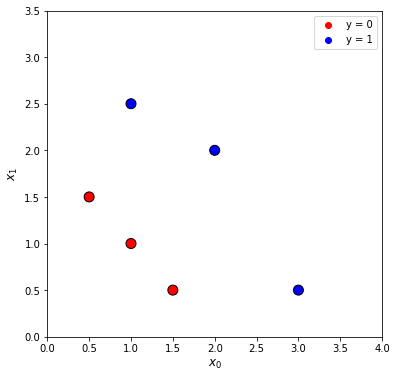

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plot_data(X_train, y_train, ax)

ax.axis([0, 4, 0, 3.5])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
ax.legend();

## Logistic Gradient Descent
Recall the gradient descent algorithm utilizes the gradient calculation:
$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

Where each iteration performs simultaneous updates on $w_j$ for all $j$, where
$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{2} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3} 
\end{align*}$$

* m is the number of training examples in the data set      
* $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target
* For a logistic regression model  
    $z = \mathbf{w} \cdot \mathbf{x} + b$  
    $f_{\mathbf{w},b}(x) = g(z)$  
    where $g(z)$ is the sigmoid function:  
    $g(z) = \frac{1}{1+e^{-z}}$   

## Gradient Descent Implementation

In [5]:
def compute_gradient_logistic(X, y, w, b):
    m,n = X.shape
    dj_dw = np.zeros(n)
    dj_db = 0.
    for i in range(m):
        z = np.dot(X[i], w) + b
        f_wb_i = 1/(1 + np.exp(-z))
        for j in range(n):
            dj_dw[j] += (f_wb_i - y[i]) * X[i, j]
        dj_db += (f_wb_i - y[i])
    return dj_dw / m, dj_db / m

Check the implementation of the gradient function using the cell below.

In [6]:
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_dw_tmp, dj_db_tmp = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]


**Expected output**
``` 
dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]
```

#### Gradient Descent Code 
The code implementing equation (1) above is implemented below. Take a moment to locate and compare the functions in the routine to the equations above.

In [7]:
def gradient_descent(X, y, w_in, b_in, alph, it):
    J_history = []
    w = w_in
    b = b_in
    
    for i in range(it):
        dj_dw, dj_db = compute_gradient_logistic(X, y, w, b)
        
        w -= alph * dj_dw
        b -= alph * dj_db
        
        J_history.append(compute_cost_logistic(X, y, w, b) )

        if i % 1000 == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
    return w, b, J_history

Let's run gradient descent on our data set.

In [8]:
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out, _ = gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters)
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost 0.684610468560574   
Iteration 1000: Cost 0.1590977666870457   
Iteration 2000: Cost 0.08460064176930078   
Iteration 3000: Cost 0.05705327279402531   
Iteration 4000: Cost 0.04290759421682   
Iteration 5000: Cost 0.03433847729884557   
Iteration 6000: Cost 0.02860379802212006   
Iteration 7000: Cost 0.02450156960879306   
Iteration 8000: Cost 0.02142370332569295   
Iteration 9000: Cost 0.019030137124109114   

updated parameters: w:[5.28123029 5.07815608], b:-14.222409982019837


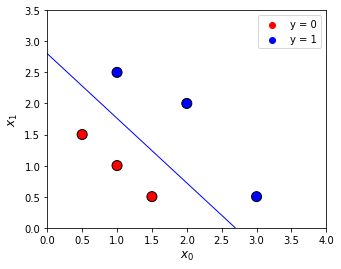

In [9]:
fig,ax = plt.subplots(1,1,figsize=(5,4))

z = np.zeros(X_train.shape[0])
# for i in range(X_train.shape[0]):
#     z[i] = np.dot(X_train[i], w_out) + b_out

# ax.plot(z, 1/(1 + np.exp(-z)), c = 'y')
ax.axis([0, 4, 0, 3.5])

ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')   
plot_data(X_train, y_train, ax)

x0 = -b_out/w_out[0]
x1 = -b_out/w_out[1]
ax.plot([0,x0],[x1,0], c="blue", lw=1)
ax.legend();